In [12]:
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:


df = pd.read_csv(r"c:\Users\User\Downloads\Ecommerce-Customers.csv")



In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,NaN,Violet,34.497268,12.655651,39.577668,4.082621,$587.95
1,hduke@hotmail.com,NaN,DarkGreen,31.926272,11.109461,37.268959,2.664034,$392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,$487.55
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,$581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,$599.41


In [4]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent      object
dtype: object

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462
std,0.992563,0.994216,1.010489,0.999278
min,29.532429,8.508152,33.913847,0.269901
25%,32.341822,11.388153,36.349257,2.930450
50%,33.082008,11.983231,37.069367,3.533975
75%,33.711985,12.753850,37.716432,4.126502
max,36.139662,15.126994,40.005182,6.922689


In [6]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247
Time on App,-0.027826,1.000000,0.082388,0.029143
Time on Website,-0.034987,0.082388,1.000000,-0.047582
Length of Membership,0.060247,0.029143,-0.047582,1.000000


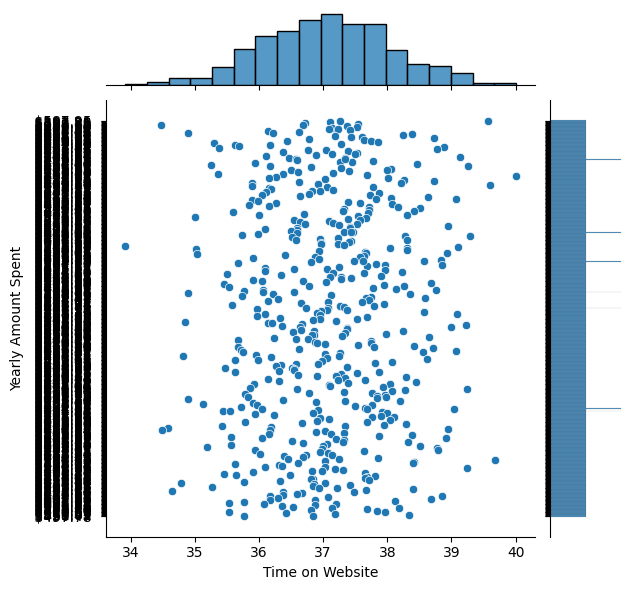

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='scatter')

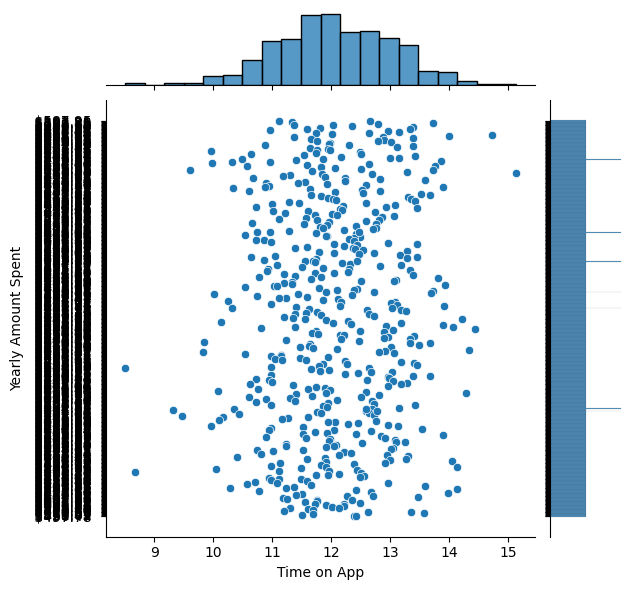

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind='scatter')

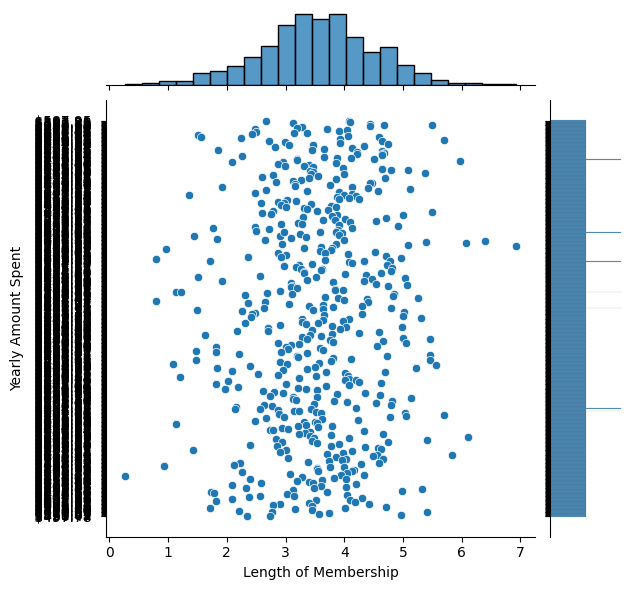

In [9]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df,kind='scatter')

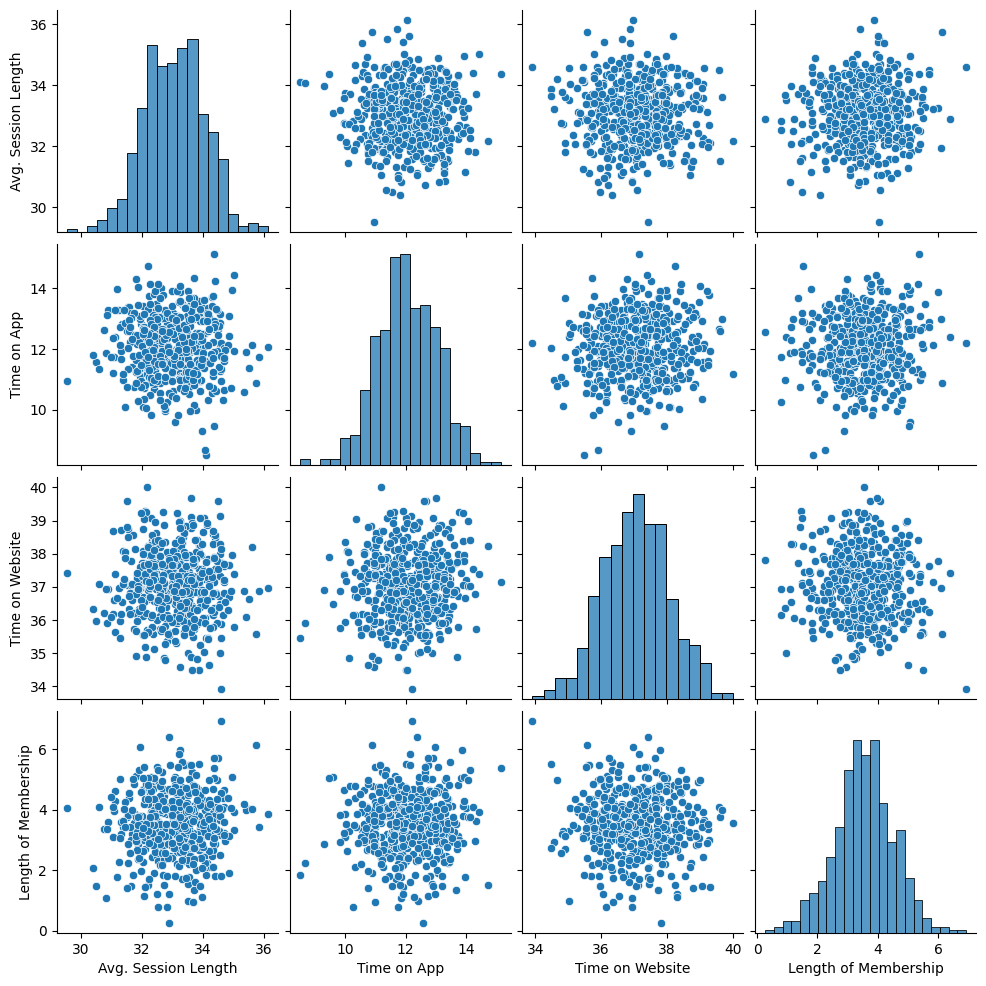

In [10]:
sns.pairplot(df)

In [20]:
x_train = df[['Time on App']]  
y_train = df['Yearly Amount Spent']
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [22]:
slope = model.coef_
intercept = model.intercept_
new_data = pd.DataFrame({'Time on App': [60]})
predictions = model.predict(new_data)
print(predictions)

[2409.28173215]


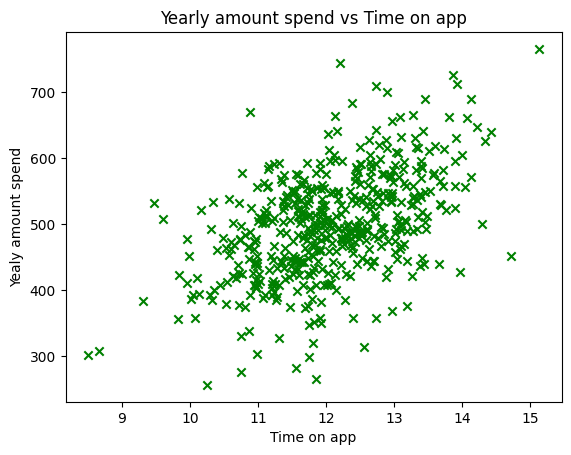

In [23]:
plt.scatter(x_train,y_train, marker='x', c='g') 

# Set the title
plt.title("Yearly amount spend vs Time on app")
# Set the y-axis label
plt.ylabel('Yealy amount spend')
# Set the x-axis label
plt.xlabel('Time on app')
plt.show()

In [24]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    cost=0
    for i in range(m):
        f=w*x.iloc[i]+b
        cost+=(f-y.iloc[i])**2
    total_cost=(1/2*m)*cost
    return total_cost
initial_w = 1
initial_b = 1

In [25]:
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'initial cost: {cost.item():.3f}')

<class 'pandas.core.series.Series'>
initial cost: 30331391942.717


In [26]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0 
    for i in range(m):
        f_wb = w*x.iloc[i]+b
        dj_db += f_wb - y.iloc[i]
        dj_dw += (f_wb - y.iloc[i])*x.iloc[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [27]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): Time on App   -6057.275148
Name: 0, dtype: float64 Time on App   -499.31424
Name: 0, dtype: float64


In [28]:
# training
def gd_train(x,y,w_in, b_in, compute_cost,compute_gradient, lr, epochs):
    m = x.shape[0]
    w= w_in
    b = b_in
    
    for iters in range(epochs):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        w = w-lr*dj_dw
        b= b-lr*dj_db
    
    return w, b

In [29]:
initial_wt = 0
initial_b = 0

epochs = 1000
lr = 0.01
w,b = gd_train(x_train,y_train,initial_wt, initial_b, compute_cost, compute_gradient, lr, epochs)

In [30]:
print(f"w:{w} and b:{b}")

w:Time on App    41.053734
Name: 0, dtype: float64 and b:Time on App    4.415496
Name: 0, dtype: float64


In [31]:
m = x_train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w*x_train.iloc[i]+b

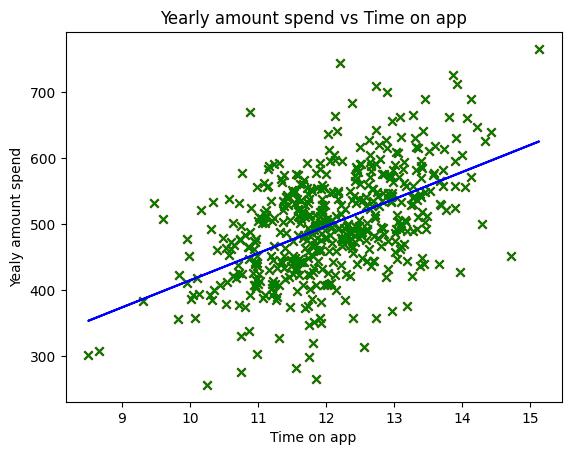

In [38]:
# Plot the linear fit
plt.plot(x_train,predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.scatter(x_train,y_train, marker='x', c='g') 

# Set the title
plt.title("Yearly amount spend vs Time on app")
# Set the y-axis label
plt.ylabel('Yealy amount spend')
# Set the x-axis label
plt.xlabel('Time on app')
plt.show()

In [45]:
def predict(x, w, b):
    return np.dot(x, w) + b


new_x = np.array([[13]]) 

predicted_value = predict(new_x,w,b)
print(f"The predicted value for input {new_x} is {predicted_value}")

The predicted value for input [[13]] is Time on App    538.114036
Name: 0, dtype: float64


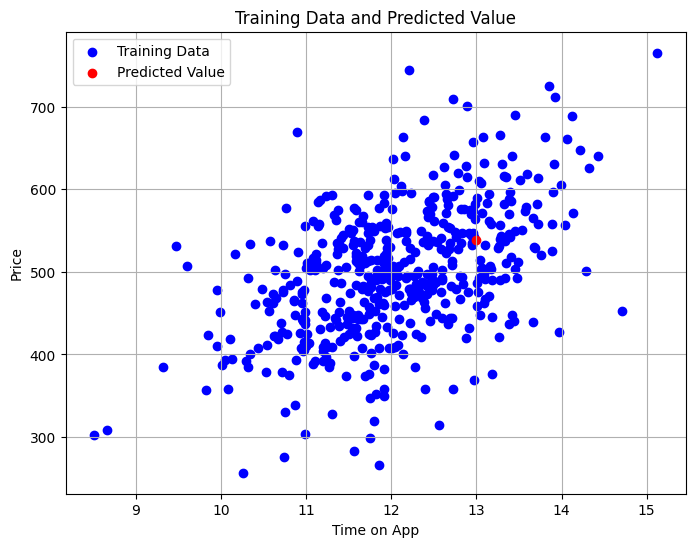

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train,y_train, color='blue', label='Training Data')
plt.scatter(new_x, predicted_value, color='red', label='Predicted Value')
plt.xlabel('Time on App')
plt.ylabel('Price')
plt.title('Training Data and Predicted Value')
plt.legend()
plt.grid(True)
plt.show()